In [16]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import cv2
%matplotlib inline

In [66]:
img = Image.open('../data/bair/traj_0_to_255/10/0.png')
img1 = Image.open('../data/bair/traj_0_to_255/10/9.png')

In [67]:
im = np.array(img)
im1 = np.array(img1)

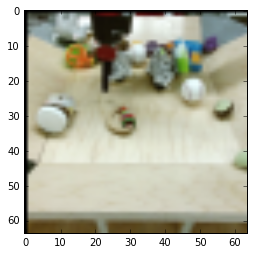

In [69]:
plt.imshow(np.array(im))

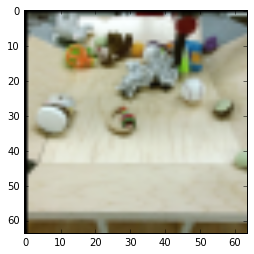

In [68]:
plt.imshow(np.array(im1))

In [ ]:
plt.imshow(np.array(im)[:30, :20, 2])

In [ ]:
def distill(x):
    x = np.array(x.convert('L'))
    x = x / np.linalg.norm(x)
    #x[x<50]=0
    #x[x<0.005] = 0
    return x.sum()
#print(distill(img), distill(img1))

In [ ]:
_all = []
for i in range(30):
    x = Image.open('../data/bair/traj_0_to_255/234/%d.png'%i)
    d = distill(x)
    print(d)
    _all.append(d)
np.std(_all)

In [36]:
import skimage
#import skimage.segmentation.slic
skimage.segmentation.slic(im1)[:10, :10]

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  6],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  6],
       [ 0,  0,  0,  0,  0,  6,  6,  6,  0,  6],
       [ 0,  6,  6,  6,  6,  6,  6,  6,  6,  6],
       [ 0,  6,  6,  6,  6,  6,  6,  6,  6,  6],
       [ 0,  6,  6,  6,  6,  6,  6,  6,  6,  6],
       [ 0, 12, 12, 12,  6,  6,  6,  6,  6,  6],
       [ 0, 12, 12, 12, 12, 12,  6,  6,  6,  6]])

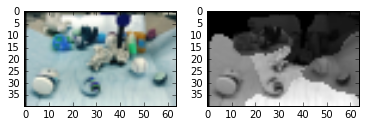

In [62]:
getimall = lambda x: cv2.imread('../data/bair/traj_0_to_255/%d/%d.png'%(x[0], x[1]))
im = getimall([10,10])
fig = plt.figure()
fig.add_subplot(1, 2, 1)
plt.imshow(im[:40,:,:])
fig.add_subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(im[:40,:,:], cv2.COLOR_BGR2GRAY)*skimage.segmentation.slic(cv2.GaussianBlur(im[:40,:,:], (13, 13), 0), 10), cmap='gray')

plt.show()

In [ ]:
sl = skimage.segmentation.slic(im1, 7, 0.1)
plt.imshow(im[sl[:]==1,s :])

In [ ]:
plt.imshow(_im-_im1)

In [ ]:
from sklearn.preprocessing import normalize
x = img
x = np.array(x.convert('L'))
#x = normalize(x, axis=0).ravel()
x = x / np.linalg.norm(x)
x[x<0.005] = 0

In [ ]:
plt.imshow(x)

In [ ]:
x[:30, :30]

In [ ]:

plt.imshow(_im1)

In [ ]:
# _im = np.array(img.convert('L'))
# _im[_im<50]=0
plt.imshow(_im)

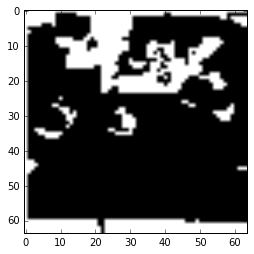

In [21]:
gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
plt.imshow(thresh, cmap='gray')

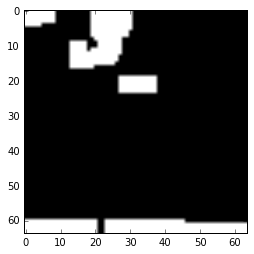

In [29]:
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
plt.imshow(opening, cmap='gray')

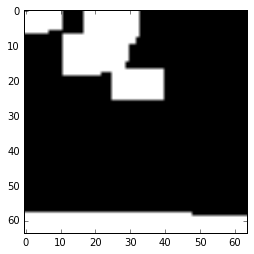

In [31]:
sure_bg = cv2.dilate(opening,kernel,iterations=2)
plt.imshow(sure_bg, cmap='gray')

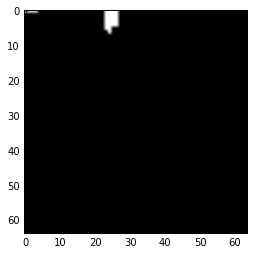

In [30]:
dist_transform = cv2.distanceTransform(opening,cv2.cv.CV_DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)
plt.imshow(sure_fg, cmap='gray')

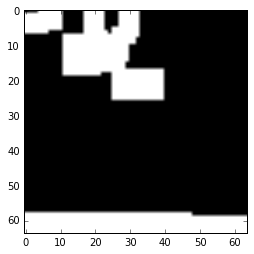

In [32]:
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)
plt.imshow(unknown, cmap='gray')

In [33]:
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers+1

# Now, mark the region of unknown with zero
markers[unknown==255] = 0
plt.imshow(markers)

AttributeError: 'module' object has no attribute 'connectedComponents'

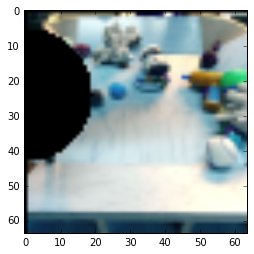

In [112]:
k=19
getimall = lambda x: cv2.imread('../data/bair/traj_0_to_255/%d/%d.png'%(x[0], x[1]))
im = getimall([15,5])
gray = cv2.GaussianBlur(cv2.cvtColor(im, cv2.COLOR_BGR2GRAY), (k, k), 0)
(minVal, maxVal, minLoc, maxLoc) = cv2.minMaxLoc(gray)
cv2.circle(im, minLoc, k, 0, -1)
plt.imshow(im)

In [113]:
k=19
getimall = lambda x: cv2.imread('../data/bair/traj_0_to_255/%d/%d.png'%(x[0], x[1]))
im1 = getimall([15,6])
gray1 = cv2.GaussianBlur(cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY), (k, k), 0)
(minVal1, maxVal1, minLoc1, maxLoc1) = cv2.minMaxLoc(gray1)
# cv2.circle(im, minLoc, k, 0, -1)
# plt.imshow(im)

55.2209472656


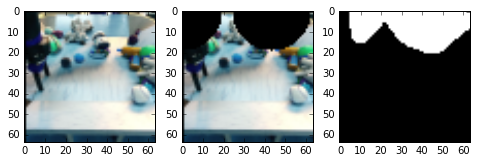

In [133]:
im = getimall([15,6])
im1 = getimall([15,6])
fig = plt.figure(figsize=(8, 6))
fig.add_subplot(1, 3, 1)
plt.imshow(im)
fig.add_subplot(1, 3, 2)
cv2.circle(im1, minLoc, k, 0, -1)
cv2.circle(im1, minLoc1, k, 0, -1)
plt.imshow(im1)
fig.add_subplot(1, 3, 3)
g0 = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)
g0 = cv2.GaussianBlur(g0, (k, k), 0)
g1 = cv2.cvtColor(im1, cv2.COLOR_RGB2GRAY)
g1 = cv2.GaussianBlur(g1, (k, k), 0)
frameDelta = cv2.absdiff(g1, g0)
thresh = cv2.threshold(frameDelta, 50, 255, cv2.THRESH_BINARY)[1]
print(np.mean(thresh))
plt.imshow(thresh, cmap='gray')
fig.show()


In [123]:
np.mean(thresh)

0.0

20.8557128906
(1, 4)
10.458984375
(5, 4)
37.7893066406
(7, 10)
28.5754394531
(12, 4)
24.2175292969
(14, 4)
24.2175292969
(15, 4)
19.5483398438
(16, 4)
41.5869140625
(17, 4)
19.5483398438
(18, 4)


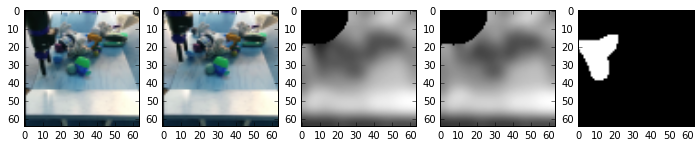

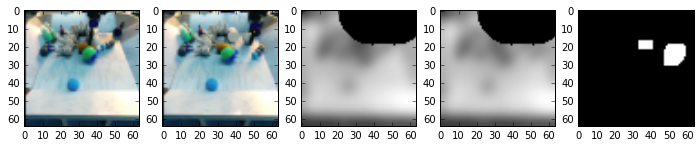

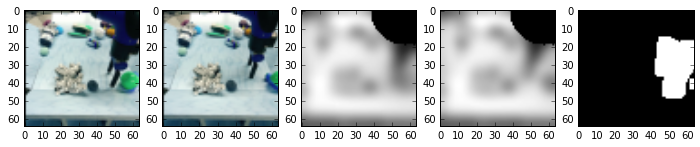

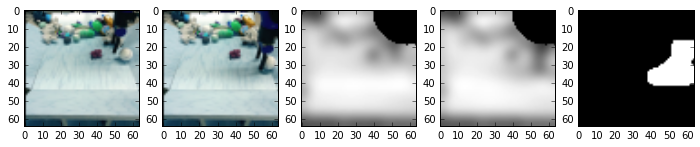

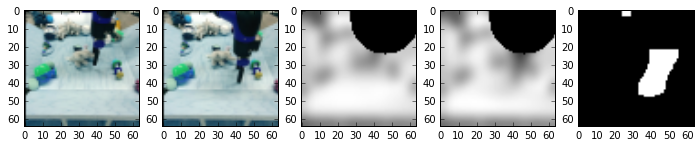

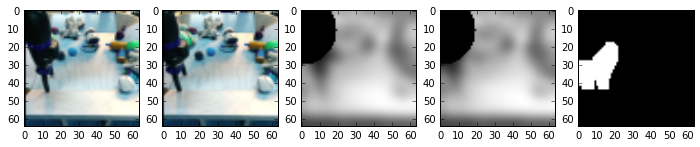

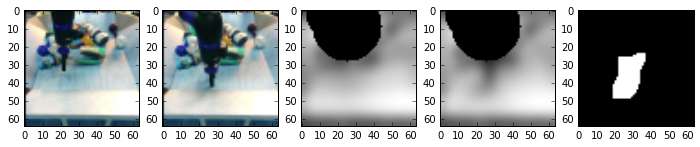

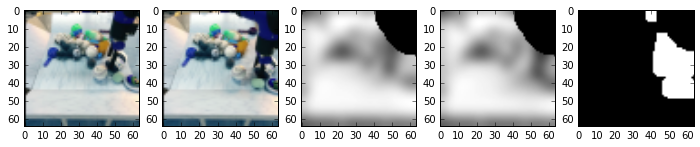

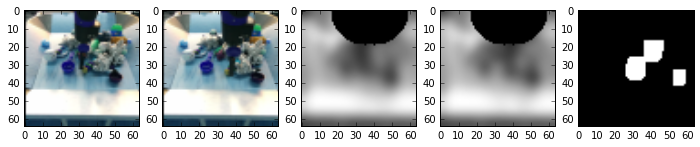

In [147]:
getimall = lambda x: cv2.imread('../data/bair/traj_0_to_255/%d/%d.png'%(x[0], x[1]))
k = 19
skip = 3
for j in range(1, 20):
    im0 = getimall([j, 0])
    gray0 = cv2.GaussianBlur(cv2.cvtColor(im0, cv2.COLOR_BGR2GRAY), (k, k), 0)
    (minVal0, maxVal0, minLoc0, maxLoc0) = cv2.minMaxLoc(gray0)    
    cv2.circle(gray0, minLoc0, k, 0, -1)
    for i in range(1, 15, 3):
        im1 = getimall([j, i])
        gray = cv2.GaussianBlur(cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY), (k, k), 0)
        (minVal, maxVal, minLoc, maxLoc) = cv2.minMaxLoc(gray)    
        cv2.circle(gray, minLoc, k, 0, -1)
        
        cv2.circle(gray, minLoc0, k, 0, -1)
        cv2.circle(gray0, minLoc, k, 0, -1)

        frameDelta = cv2.absdiff(gray0, gray)
        thresh = cv2.threshold(frameDelta, 25, 255, cv2.THRESH_BINARY)[1]
        thresh = cv2.dilate(thresh, None, iterations=2)
        
#         '''
        if np.mean(thresh) > 10:
            fig = plt.figure(figsize=(12, 8))
            fig.add_subplot(1, 5, 1)
            plt.imshow(im0)
            fig.add_subplot(1, 5, 2)
            plt.imshow(im1)
            fig.add_subplot(1, 5, 3)
            plt.imshow(gray0, cmap='gray')
            fig.add_subplot(1, 5, 4)                        
            plt.imshow(gray, cmap='gray')
            fig.add_subplot(1, 5, 5)
            plt.imshow(thresh, cmap='gray')
            fig.show()
#         '''

        if np.mean(thresh) > 10:
            print(np.mean(thresh))
            print(j, i)
            break

        gray0 = cv2.GaussianBlur(cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY), (k, k), 0)
        (minVal0, maxVal0, minLoc0, maxLoc0) = cv2.minMaxLoc(gray0)    
        cv2.circle(gray0, minLoc0, k, 0, -1)
